**Business Intelligence - Assignment 2**

Bakir Bajrovic 12347510

Emirhan Kurtulus 12243493

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('/content/drive/MyDrive/mobile_dataset/train.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Data Understanding

## Atribute Types and Statistical Properties

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


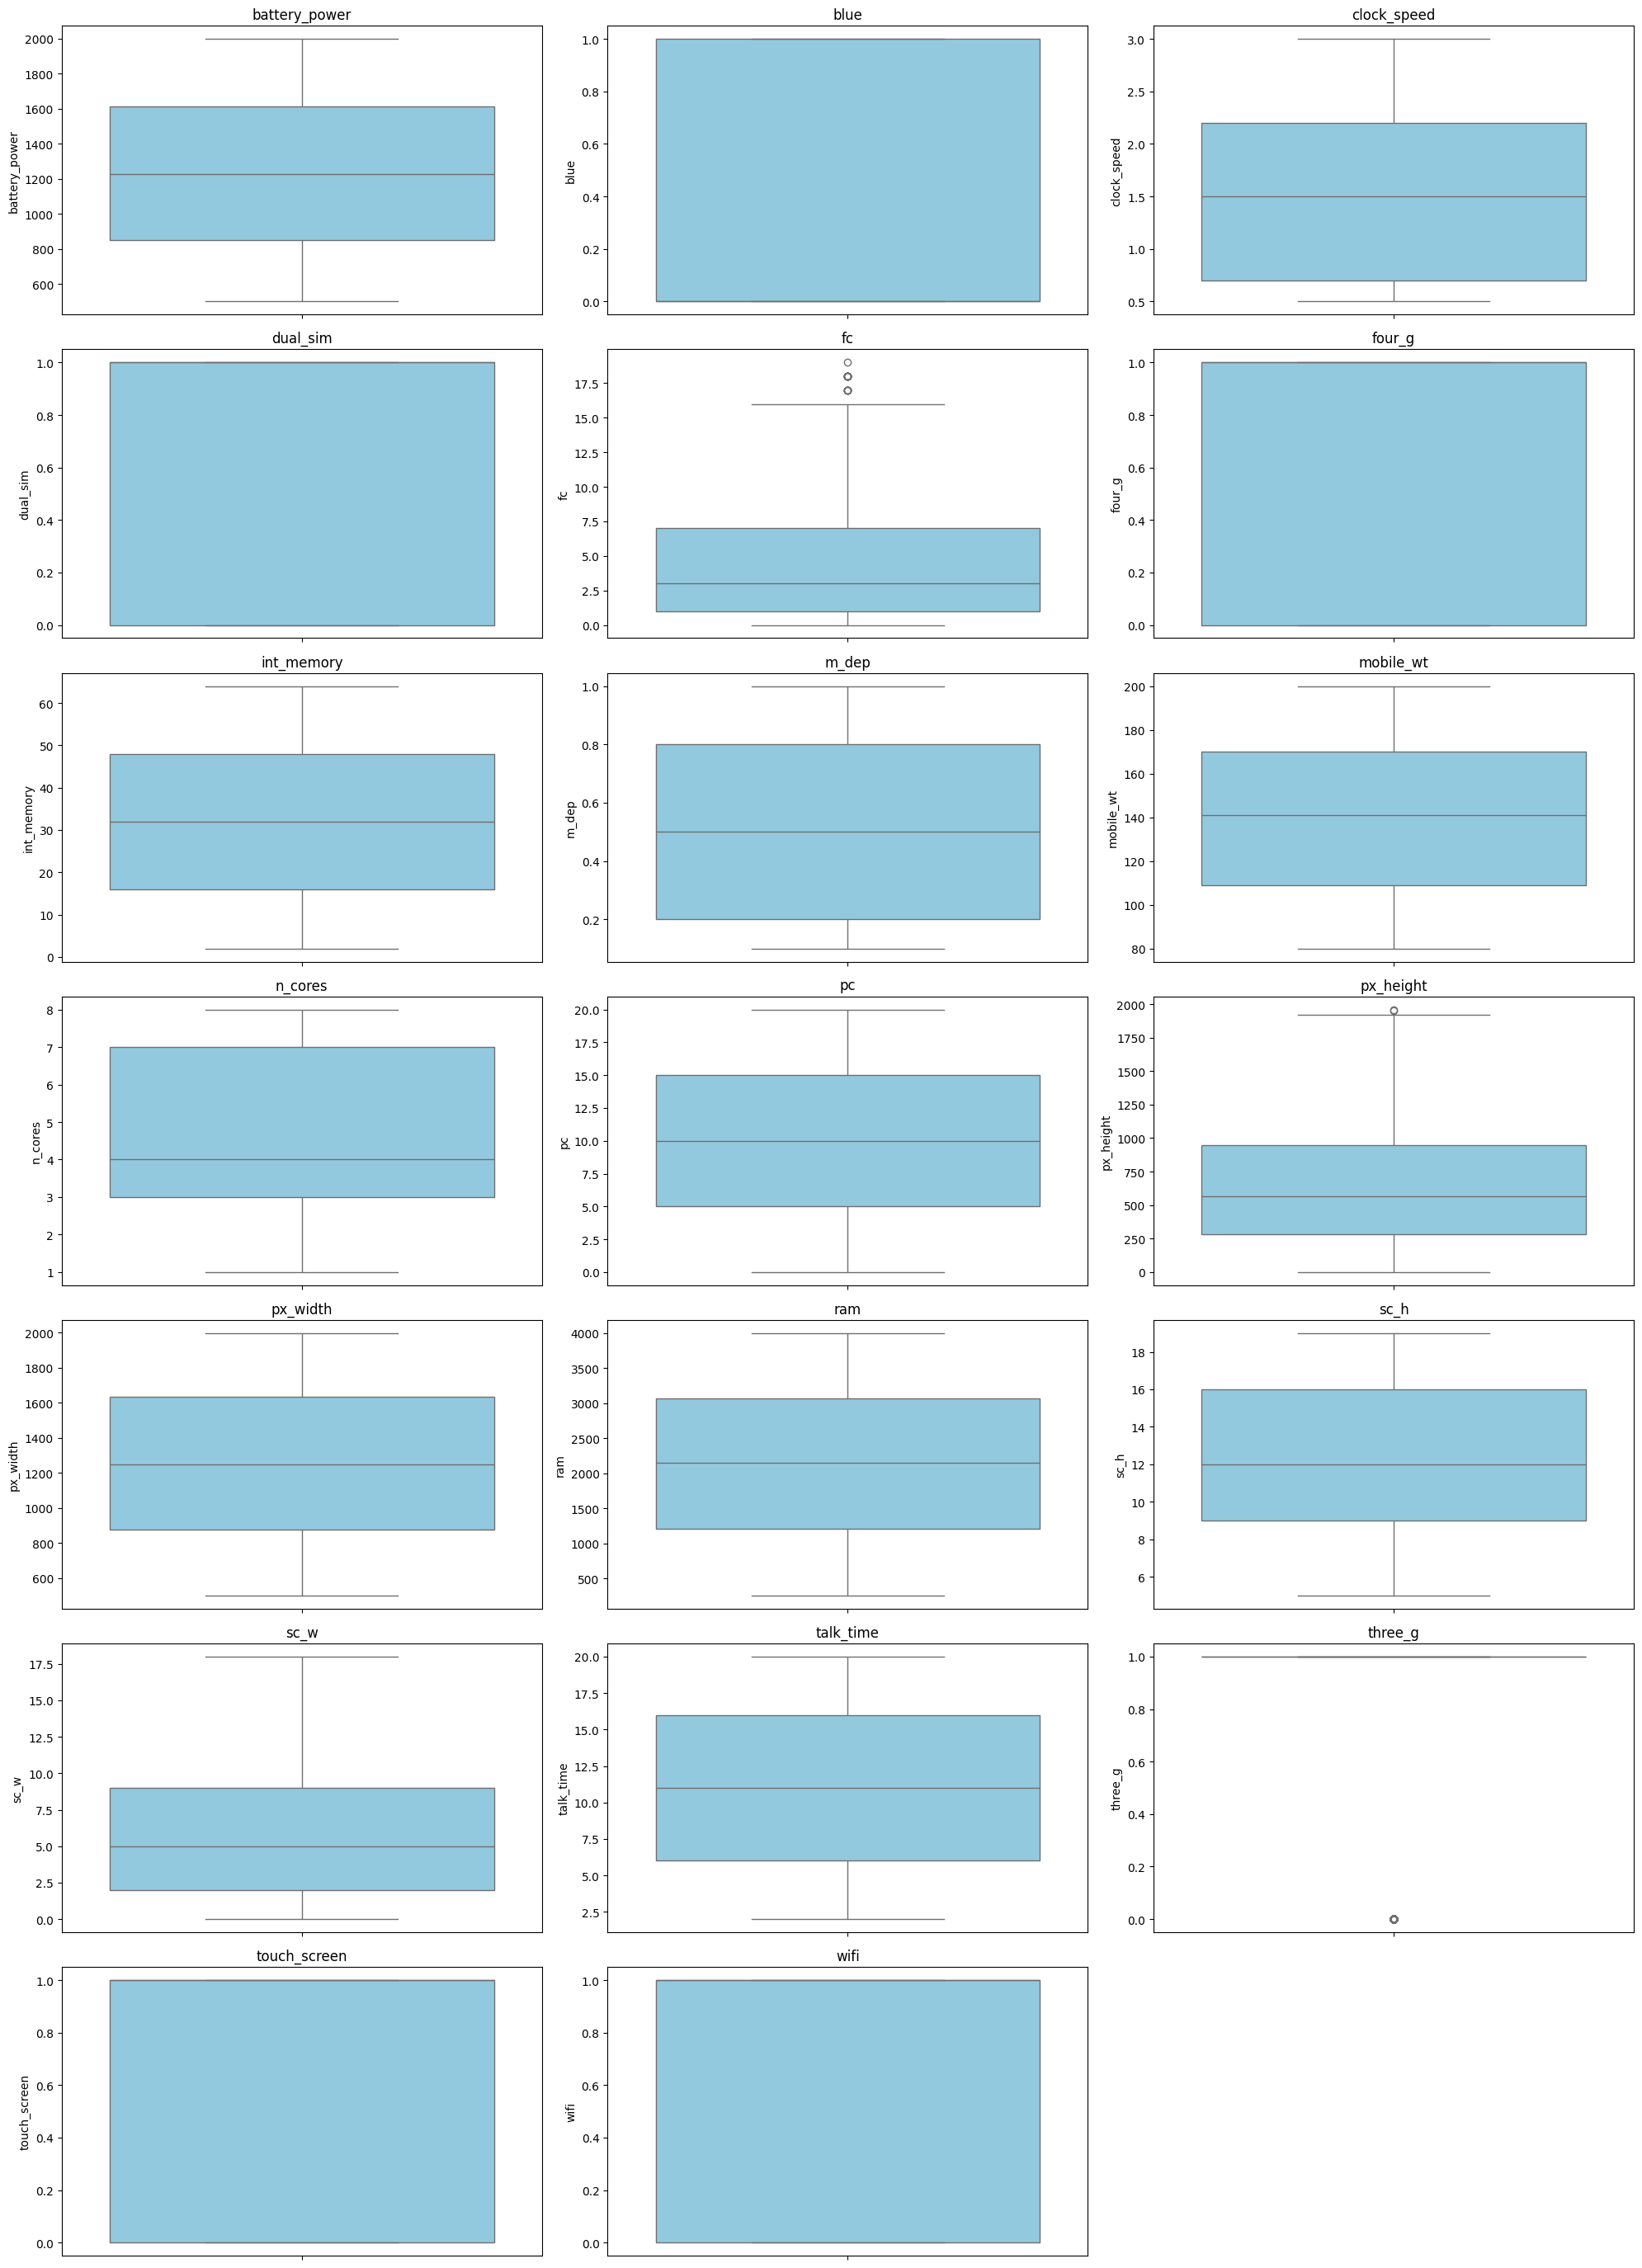

In [7]:
# visualize the statistical properties from above with box plots

# only using features (all columns except price_range)
features = df.drop(columns=['price_range'])

plt.figure(figsize=(20, 30))

for i, column in enumerate(features.columns, 1):
    plt.subplot((len(features.columns) + 2) // 3, 3, i)
    sns.boxplot(y=features[column], color="skyblue")
    plt.title(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [9]:
print(df['price_range'].unique())

[1 2 3 0]


In [10]:
correlation_matrix = df.corr()

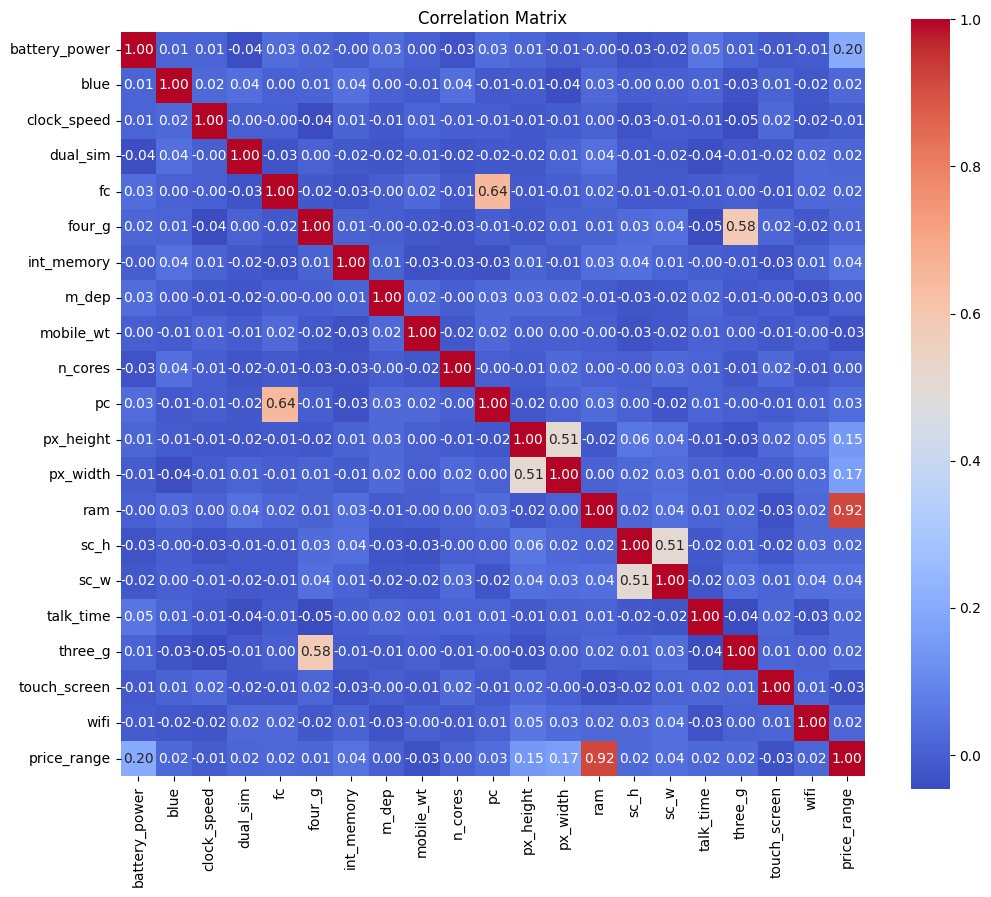

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

## Visual Exploration

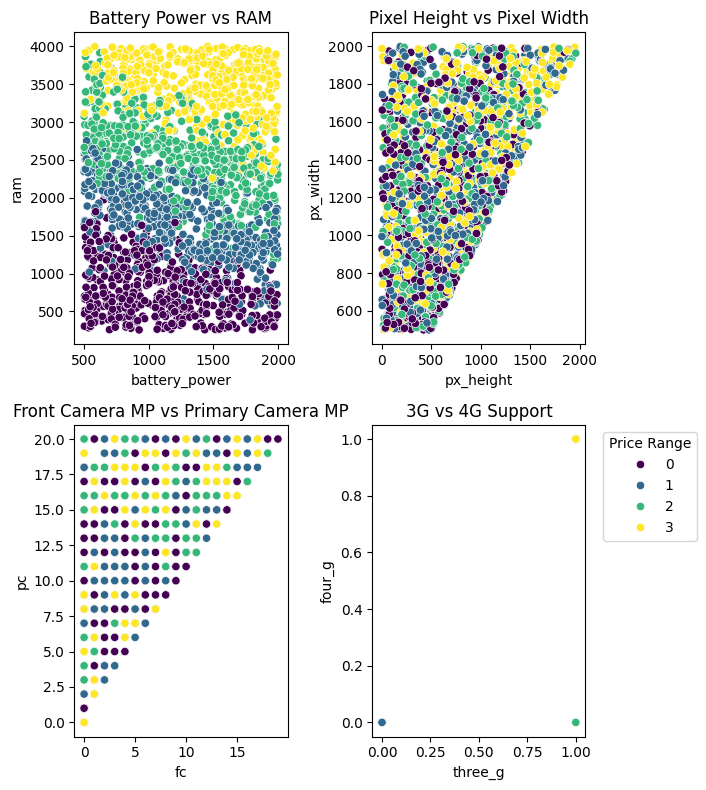

In [12]:
plt.figure(figsize=(8,8))

# battery_power vs ram
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='battery_power', y='ram', hue='price_range', palette="viridis", legend=False)
plt.title('Battery Power vs RAM')

# px_height vs px_width
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='px_height', y='px_width', hue='price_range', palette="viridis", legend=False)
plt.title('Pixel Height vs Pixel Width')

# fc vs pc
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='fc', y='pc', hue='price_range', palette="viridis", legend=False)
plt.title('Front Camera MP vs Primary Camera MP')

# three_g vs four_g
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='three_g', y='four_g', hue='price_range', palette="viridis")
plt.title('3G vs 4G Support')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

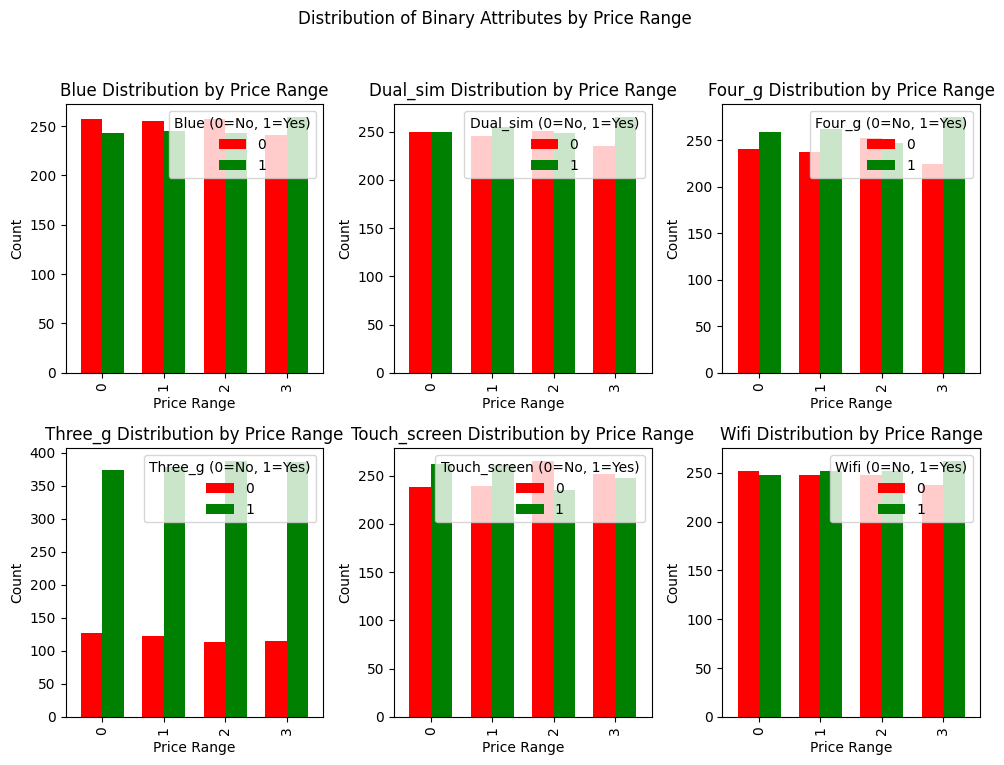

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle("Distribution of Binary Attributes by Price Range")

binary_attributes = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for i, attr in enumerate(binary_attributes):
    grouped_data = df.groupby(['price_range', attr]).size().unstack().fillna(0)

    ax = axes[i // 3, i % 3]
    grouped_data.plot(kind='bar', stacked=False, ax=ax, color=['red', 'green'], width=0.7)
    ax.set_title(f'{attr.capitalize()} Distribution by Price Range')
    ax.set_xlabel("Price Range")
    ax.set_ylabel("Count")
    ax.legend(title=f"{attr.capitalize()} (0=No, 1=Yes)", loc="upper right")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**The line chart plot is moved into the Data Preparation part because it works better on scaled data**

# Data Preparation

## Dataset Splitting

In [14]:
X = df.drop(columns=['price_range'])

In [15]:
y = df['price_range']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [17]:
y_train.shape

(1400,)

In [18]:
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Test set class distribution:\n", y_test.value_counts(normalize=True))

Training set class distribution:
 price_range
1    0.25
2    0.25
0    0.25
3    0.25
Name: proportion, dtype: float64
Test set class distribution:
 price_range
3    0.25
1    0.25
2    0.25
0    0.25
Name: proportion, dtype: float64


## Defining the Characteristic of the Features

In [19]:
print(X_train.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


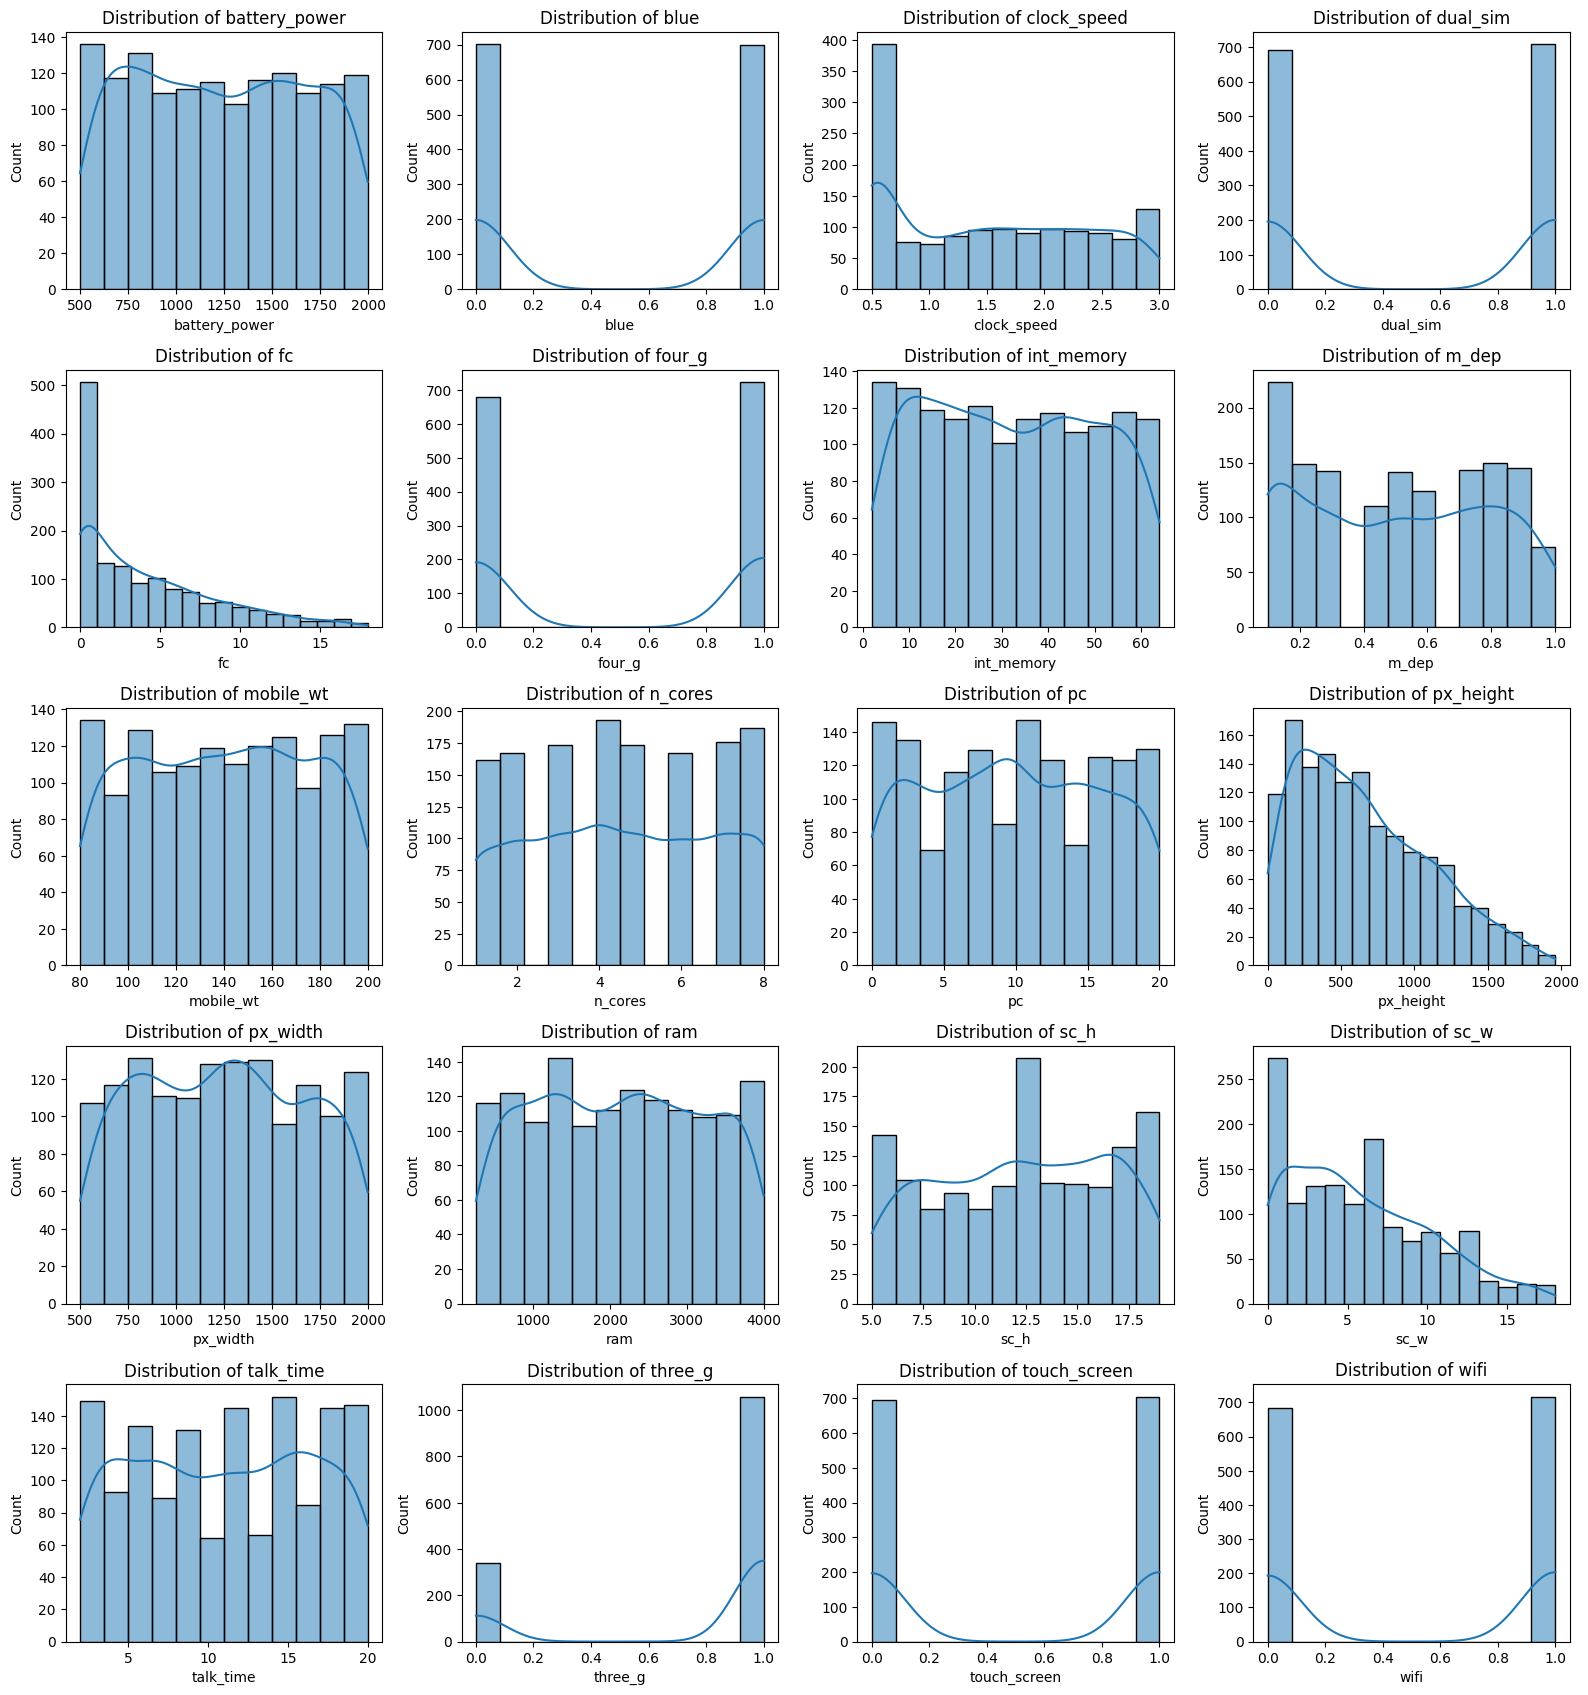

In [20]:
plt.figure(figsize=(16, 20))

for i, column in enumerate(X_train, start=1):
    plt.subplot(6, 4, i)
    sns.histplot(X_train[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

## Scaling

In [21]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit(X_train).transform(X_train), columns=X_train.columns).reset_index(drop=True)

In [22]:
X_train.shape

(1400, 20)

In [23]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.976452,1.00143,-1.245224,0.988636,-0.991789,-1.031938,0.266596,-1.052203,-0.371322,-0.247588,-1.624363,-0.911125,-0.971849,0.180472,-1.753980,-0.408538,-1.257549,-1.762263,-1.007169,-1.024588
1,-0.390618,1.00143,-1.245224,-1.011495,-0.991789,0.969050,-0.996928,0.671913,-1.446330,-1.125115,-1.293608,-1.038609,-0.740549,0.878873,-0.551683,-1.094333,1.267598,0.567452,-1.007169,0.976002
2,-0.149926,1.00143,0.211077,0.988636,-0.521189,-1.031938,-0.722249,-0.707380,0.760265,1.068703,1.517813,-0.904415,-1.144740,-1.711378,-1.513521,-0.179940,-0.536078,-1.762263,-1.007169,-1.024588
3,-1.426045,1.00143,1.788737,-1.011495,2.537708,0.969050,0.651147,-0.707380,-0.654219,-1.563879,1.021680,-1.329363,0.018769,0.421554,0.650615,1.191650,0.726495,0.567452,-1.007169,0.976002
4,-0.099971,1.00143,0.939228,-1.011495,0.655310,-1.031938,-0.667313,1.706382,0.505658,1.068703,0.525547,1.766046,1.539742,-0.151706,-1.273061,-0.179940,-1.618284,0.567452,-1.007169,-1.024588


In [24]:
correlation_matrix = X_train.corr()

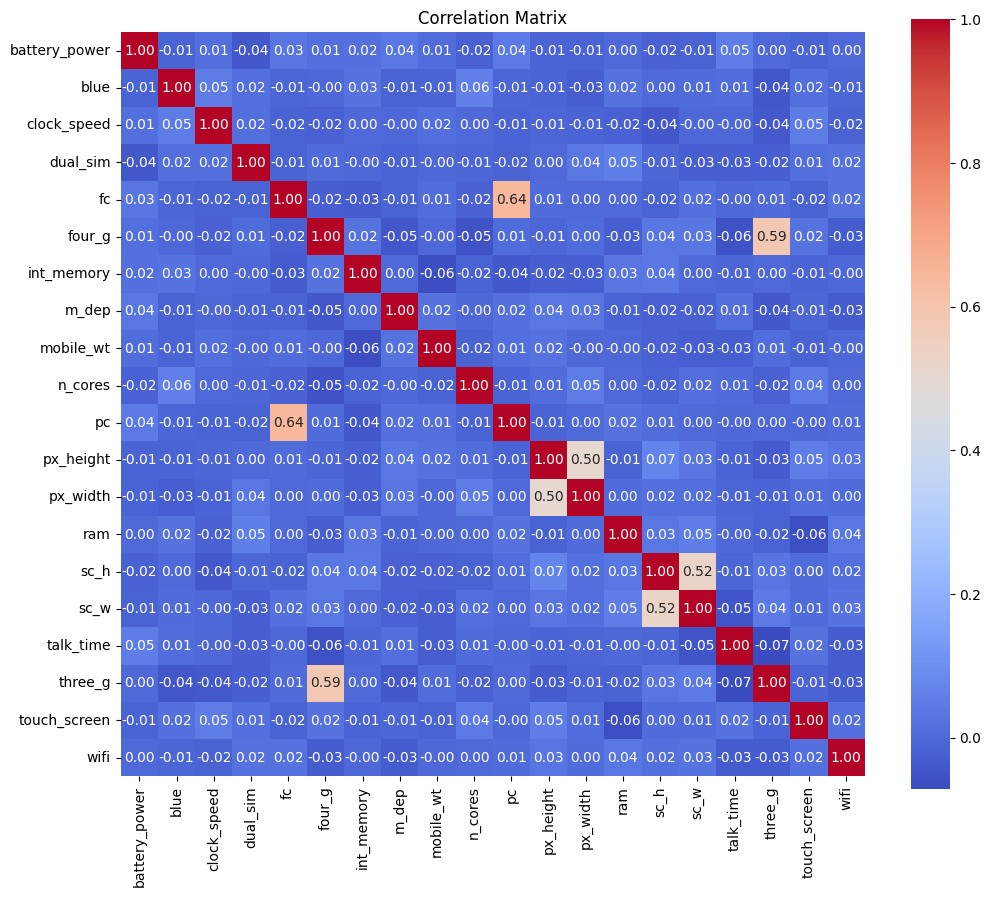

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In [26]:
scaled_df = pd.concat([X_train, pd.DataFrame(y_train).reset_index(drop=True)], axis=1)

In [27]:
scaled_df.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.976452,1.001430,-1.245224,0.988636,-0.991789,-1.031938,0.266596,-1.052203,-0.371322,-0.247588,...,-0.911125,-0.971849,0.180472,-1.753980,-0.408538,-1.257549,-1.762263,-1.007169,-1.024588,1
1,-0.390618,1.001430,-1.245224,-1.011495,-0.991789,0.969050,-0.996928,0.671913,-1.446330,-1.125115,...,-1.038609,-0.740549,0.878873,-0.551683,-1.094333,1.267598,0.567452,-1.007169,0.976002,2
2,-0.149926,1.001430,0.211077,0.988636,-0.521189,-1.031938,-0.722249,-0.707380,0.760265,1.068703,...,-0.904415,-1.144740,-1.711378,-1.513521,-0.179940,-0.536078,-1.762263,-1.007169,-1.024588,0
3,-1.426045,1.001430,1.788737,-1.011495,2.537708,0.969050,0.651147,-0.707380,-0.654219,-1.563879,...,-1.329363,0.018769,0.421554,0.650615,1.191650,0.726495,0.567452,-1.007169,0.976002,1
4,-0.099971,1.001430,0.939228,-1.011495,0.655310,-1.031938,-0.667313,1.706382,0.505658,1.068703,...,1.766046,1.539742,-0.151706,-1.273061,-0.179940,-1.618284,0.567452,-1.007169,-1.024588,2
5,0.408660,1.001430,1.424662,-1.011495,-0.521189,0.969050,1.310377,1.361559,-0.739088,0.629939,...,-0.354220,0.943970,-1.410485,-0.311223,-0.637136,-0.896814,0.567452,-1.007169,0.976002,0
6,0.497216,1.001430,-1.245224,0.988636,0.655310,-1.031938,-1.381479,-0.362557,-0.993695,0.191176,...,0.381611,-0.329349,-0.493086,-1.513521,-0.179940,1.628333,0.567452,-1.007169,0.976002,1
7,1.146629,1.001430,0.089719,-1.011495,-0.285889,-1.031938,0.925826,1.016736,-1.135143,-1.563879,...,1.077183,0.523424,-0.161828,-1.753980,-0.408538,-0.896814,0.567452,-1.007169,0.976002,2
8,-1.276181,-0.998572,0.939228,-1.011495,1.361209,-1.031938,1.530120,1.361559,0.109602,0.191176,...,-1.029663,-1.140067,-0.356902,-1.273061,-1.322931,0.365760,0.567452,-1.007169,0.976002,0
9,-1.351113,1.001430,-1.245224,-1.011495,-0.991789,0.969050,0.321532,1.016736,-1.531199,0.191176,...,0.524751,1.238351,-1.553110,-0.792142,-0.865735,-1.618284,0.567452,0.992882,-1.024588,0


In [28]:
scaled_df.shape

(1400, 21)

## Visual Exploration on Scaled Data

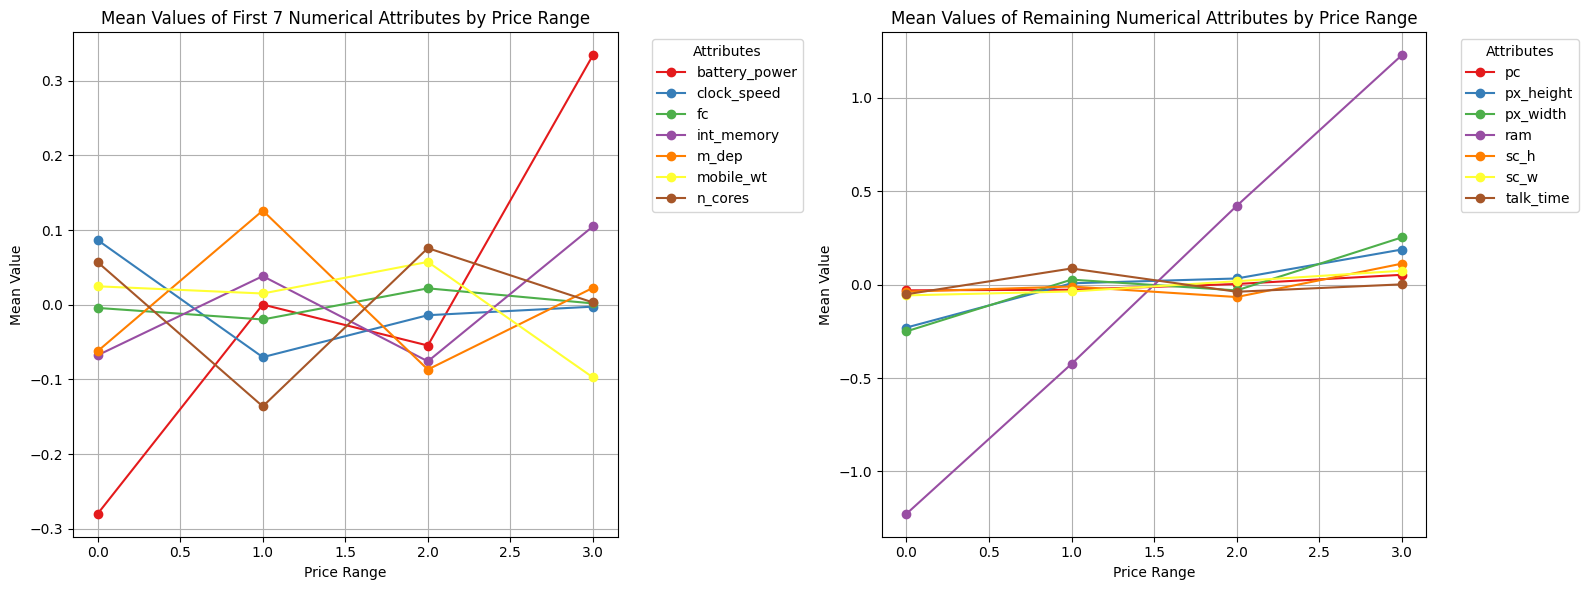

In [29]:
binary_attributes_plus_target = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
numerical_columns = [col for col in scaled_df.columns if col not in binary_attributes_plus_target]

mean_values = scaled_df.groupby('price_range')[numerical_columns].mean()

first_half_columns = numerical_columns[:7]
second_half_columns = numerical_columns[7:]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

palette = sns.color_palette("Set1", len(first_half_columns))
for i, column in enumerate(first_half_columns):
    axes[0].plot(mean_values.index, mean_values[column], marker='o', label=column, color=palette[i])

axes[0].set_title("Mean Values of First 7 Numerical Attributes by Price Range")
axes[0].set_xlabel("Price Range")
axes[0].set_ylabel("Mean Value")
axes[0].legend(title="Attributes", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True)

palette = sns.color_palette("Set1", len(second_half_columns))
for i, column in enumerate(second_half_columns):
    axes[1].plot(mean_values.index, mean_values[column], marker='o', label=column, color=palette[i])

axes[1].set_title("Mean Values of Remaining Numerical Attributes by Price Range")
axes[1].set_xlabel("Price Range")
axes[1].set_ylabel("Mean Value")
axes[1].legend(title="Attributes", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Attribute Derivation Checking



In [30]:
# # The Pythagorean theorem was used.
# scaled_df['diagonal_screen_size'] = ((scaled_df['sc_w'] ** 2) + (scaled_df['sc_h'] ** 2)) ** 0.5

In [31]:
# correlation_matrix = scaled_df.corr()

In [32]:
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
# plt.title("Correlation Matrix")
# plt.show()

# Modeling

## Grid Search and CV

### KNN Classifier

In [33]:
knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy', verbose=1)
knn_grid_search.fit(X_train, y_train)

best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_



print("Best KNN Parameters:", best_knn_params)
print("Best KNN Accuracy:", best_knn_score)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best KNN Accuracy: 0.5835714285714285


### Random Forest Classifier

In [34]:
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', verbose=1)
rf_grid_search.fit(X_train, y_train)

best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_


print("Best Random Forest Parameters:", best_rf_params)
print("Best Random Forest Accuracy:", best_rf_score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.8642857142857142


### Visualization of the Tuning Process

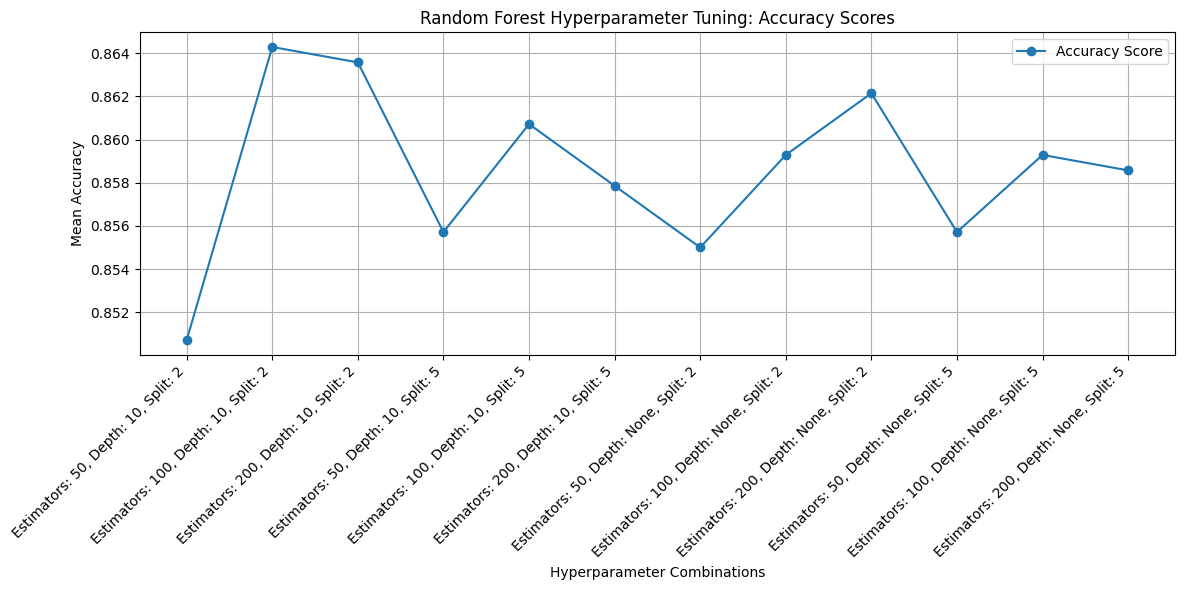

In [35]:
rf_results = pd.DataFrame(rf_grid_search.cv_results_)

mean_test_scores = rf_results['mean_test_score']
param_combinations = [f"Estimators: {n}, Depth: {d}, Split: {s}"
                      for n, d, s in zip(
                          rf_results['param_n_estimators'],
                          rf_results['param_max_depth'],
                          rf_results['param_min_samples_split']
                      )]

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(mean_test_scores) + 1), mean_test_scores, marker='o', label="Accuracy Score")
plt.xticks(range(1, len(mean_test_scores) + 1), param_combinations, rotation=45, ha='right')
plt.title("Random Forest Hyperparameter Tuning: Accuracy Scores")
plt.xlabel("Hyperparameter Combinations")
plt.ylabel("Mean Accuracy")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
# must do this so python can group it by none
rf_results['param_max_depth'] = rf_results['param_max_depth'].apply(lambda x: 'None' if x is None else x)

mean_accuracy_max_depth = rf_results.groupby('param_max_depth')['mean_test_score'].mean()

mean_accuracy_n_estimators = rf_results.groupby('param_n_estimators')['mean_test_score'].mean()

mean_accuracy_min_samples_split = rf_results.groupby('param_min_samples_split')['mean_test_score'].mean()

print("Mean Accuracy for Different Max Depth Values:")
print(mean_accuracy_max_depth)
print("\nMean Accuracy for Different Number of Estimators:")
print(mean_accuracy_n_estimators)
print("\nMean Accuracy for Different Min Samples Split Values:")
print(mean_accuracy_min_samples_split)

Mean Accuracy for Different Max Depth Values:
param_max_depth
10      0.858810
None    0.858333
Name: mean_test_score, dtype: float64

Mean Accuracy for Different Number of Estimators:
param_n_estimators
50     0.854286
100    0.860893
200    0.860536
Name: mean_test_score, dtype: float64

Mean Accuracy for Different Min Samples Split Values:
param_min_samples_split
2    0.859167
5    0.857976
Name: mean_test_score, dtype: float64
